# RQ 2: Chart Advantage

In [1]:
import os.path
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Getting and reading raw json datasets
urla = 'https://raw.githubusercontent.com/EloiseXu/Data-Science-in-Practice/master/datasets/1100_apple_chart_dataset.json'
applestore_all_charts = pd.read_json(urla)

urlg = 'https://raw.githubusercontent.com/EloiseXu/Data-Science-in-Practice/master/datasets/1200_google_chart_dataset.json'
googlestore_all_charts = pd.read_json(urlg)

## Apple Store Chart Preprocessing

In [3]:
# Check to see what types of charts we will be working with
applestore_all_charts.chart.unique()

array(['top-grossing-apps', 'free-apps', 'paid-apps'], dtype=object)

#### Apple Store Grossing

In [4]:
applestore_grossing = applestore_all_charts.groupby(['chart']).get_group('top-grossing-apps')
applestore_grossing.dropna(axis=0).reset_index(drop=True);

apple_grossing = applestore_grossing[['title', 'rating']].copy()
apple_grossing['rating'] = apple_grossing['rating'].astype(float)
apple_grossing.rename(columns={'title':'apple_app','rating':'apple_ratings'}, inplace=True)
apple_grossing.reset_index(drop=True, inplace=True)

#### Apple Store Paid

In [5]:
applestore_paid = applestore_all_charts.groupby(['chart']).get_group('paid-apps')
applestore_paid.dropna(axis=0).reset_index(drop=True);

apple_paid = applestore_paid[['title', 'rating']].copy()
apple_paid['rating'] = apple_paid['rating'].astype(float)
apple_paid.rename(columns={'title':'apple_app','rating':'apple_ratings'}, inplace=True)
apple_paid.reset_index(drop=True, inplace=True)

#### Apple Store Free

In [6]:
applestore_free = applestore_all_charts.groupby(['chart']).get_group('free-apps')
applestore_free.dropna(axis=0).reset_index(drop=True);

apple_free = applestore_free[['title', 'rating']].copy()
apple_free['rating'] = apple_free['rating'].astype(float)
apple_free.rename(columns={'title':'apple_app','rating':'apple_ratings'}, inplace=True)
apple_free.reset_index(drop=True, inplace=True)

## Google Store Chart Preprocessing

In [7]:
# Check to see what types of charts we will be working with:

googlestore_all_charts['table_title'].unique()

# As there are many more charts within Google Play, we will use the 3 corresponding charts available in both platforms:
# With Google Play, we will use Top Grossing Apps for the Grossing chart,
# Top Selling Apps for the Paid chart,
# and Top Apps for the Free chart.

array(['Top Selling Apps', 'Top Selling Games', 'Top New Apps',
       'Top Selling New Apps', 'Top Games', 'Top Grossing Games',
       'Top Grossing Apps', 'Top Apps', 'Top New Games',
       'Top Selling New Games'], dtype=object)

In [8]:
# This is our handy clean_google_app_title which isolates the string of app title
# (returns the 2nd component and everything after it using[1:])

clean_google_app_title = lambda x: ' '.join(x.split()[1:])

#### Google Store Grossing

In [9]:
googlestore_grossing = googlestore_all_charts.groupby(['table_title']).get_group("Top Grossing Apps")
googlestore_grossing['title_clean'] = googlestore_grossing['title'].apply(clean_google_app_title)

google_grossing = googlestore_grossing[['title_clean', 'rating']].copy()
google_grossing['rating'] = google_grossing['rating'].astype(float)
google_grossing.rename(columns={'title_clean':'google_app','rating':'google_ratings'}, inplace=True)
google_grossing = google_grossing.reset_index(drop=True)

#### Google Store Paid

In [10]:
googlestore_paid = googlestore_all_charts.groupby(['table_title']).get_group("Top Selling Apps")
googlestore_paid['title_clean'] = googlestore_paid['title'].apply(clean_google_app_title)

google_paid = googlestore_paid[['title_clean', 'rating']].copy()
google_paid['rating'] = google_paid['rating'].astype(float)
google_paid.rename(columns={'title_clean':'google_app','rating':'google_ratings'}, inplace=True)
google_paid = google_paid.reset_index(drop=True)

#### Google Store Free

In [11]:
googlestore_free = googlestore_all_charts.groupby(['table_title']).get_group("Top Apps")
googlestore_free['title_clean'] = googlestore_free['title'].apply(clean_google_app_title)

google_free = googlestore_free[['title_clean', 'rating']].copy()
google_free['rating'] = google_free['rating'].astype(float)
google_free.rename(columns={'title_clean':'google_app','rating':'google_ratings'}, inplace=True)
google_free = google_free.reset_index(drop=True)

## Plots of the shared apps on a chart, followed by the chart scatter plots

#### Grossing Charts

In [12]:
common_grossing_apps = google_grossing.merge(apple_grossing, left_on='google_app', right_on='apple_app')
common_grossing_apps = common_grossing_apps.drop(['apple_app'], axis = 1)
common_grossing_apps.rename(columns={'google_app':'title'}, inplace=True);

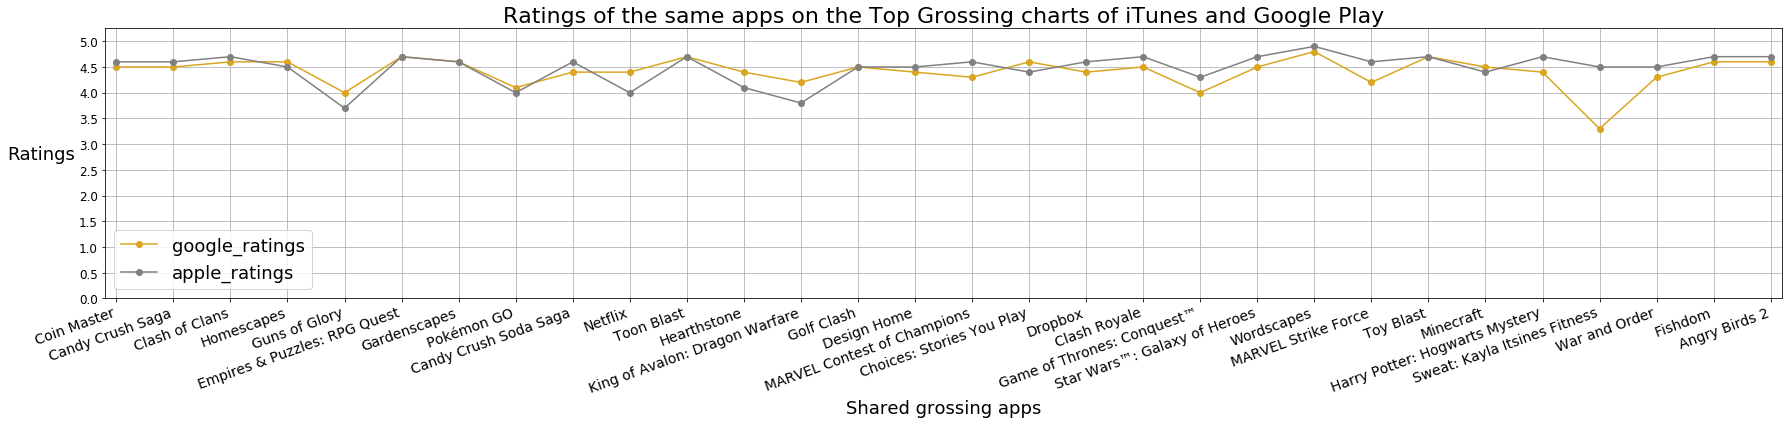

In [14]:
ax = common_grossing_apps.plot(figsize=(25, 6), color = ['goldenrod','grey'], marker='o', kind='line')
ax.legend(fontsize = 18, loc = 'lower left')
ax.set_xticklabels(common_grossing_apps['title'], fontsize = 14, rotation = 20, ha = 'right')
ax.grid(which='major', axis='both')

plt.title('Ratings of the same apps on the Top Grossing charts of iTunes and Google Play', fontsize = 22)
plt.xticks(np.arange(0, len(common_grossing_apps.title), step=1))
plt.xlim(-0.2, len(common_grossing_apps.title)-0.8) # Length of x axis components -1 then +0.2
plt.yticks(np.arange(0, 5.5, step=0.5), fontsize = 12)
plt.ylim(0,5.25)

plt.xlabel('Shared grossing apps', fontsize = 18)
ratinglabel = plt.ylabel('Ratings', fontsize = 18, ha = 'right')
ratinglabel.set_rotation(0);
plt.tight_layout()
plt.savefig('Top_grossing_sameapp_ratings.png');

In [15]:
# In order to create our Chart Scatter Plots, we need to create a new column to store the index of the component

apple_grossing['index'] = apple_grossing.index.values
google_grossing['index'] = google_grossing.index.values

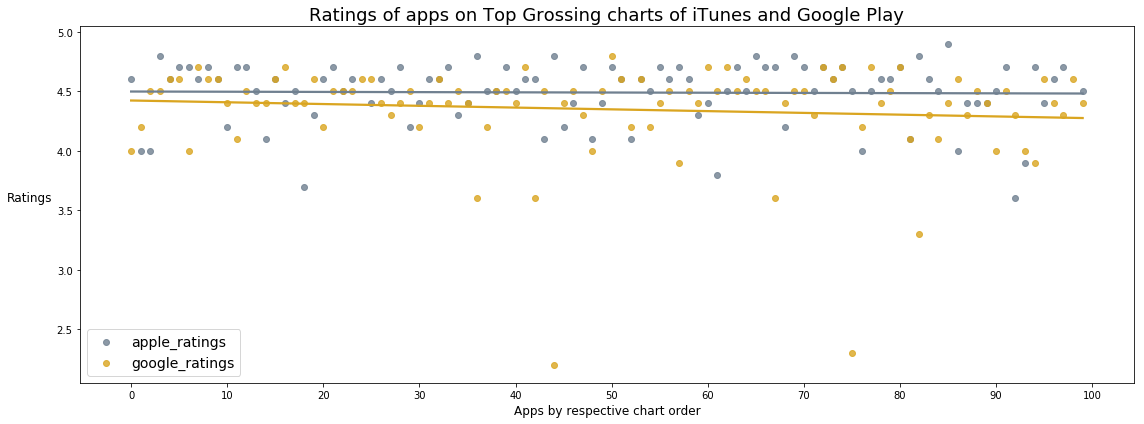

In [16]:
fig, ax = plt.subplots(figsize=(16,6))
sns.regplot('index', 'apple_ratings', truncate = True, color = 'slategrey', label = 'apple_ratings', data=apple_grossing, order=1, ci = False, ax=ax)
sns.regplot('index', 'google_ratings', truncate = True, color = 'goldenrod', label = 'google_ratings', data=google_grossing, order=1, ci = False, ax=ax)
plt.legend(loc = 'lower left', fontsize = 14)
plt.title('Ratings of apps on Top Grossing charts of iTunes and Google Play', fontsize = 18)

plt.xticks(np.arange(0, len(google_grossing.google_app) + 10, step=10))
plt.xlabel('Apps by respective chart order', fontsize = 12)
ratinglabel = plt.ylabel('Ratings', fontsize = 12, ha = 'right')
ratinglabel.set_rotation(0);
plt.tight_layout()
plt.savefig('Top_grossing_ratings.png');

#### Paid Charts

In [17]:
common_paid_apps = google_paid.merge(apple_paid, left_on='google_app', right_on='apple_app')
common_paid_apps = common_paid_apps.drop(['apple_app'], axis = 1)
common_paid_apps.rename(columns={'google_app':'title'}, inplace=True);

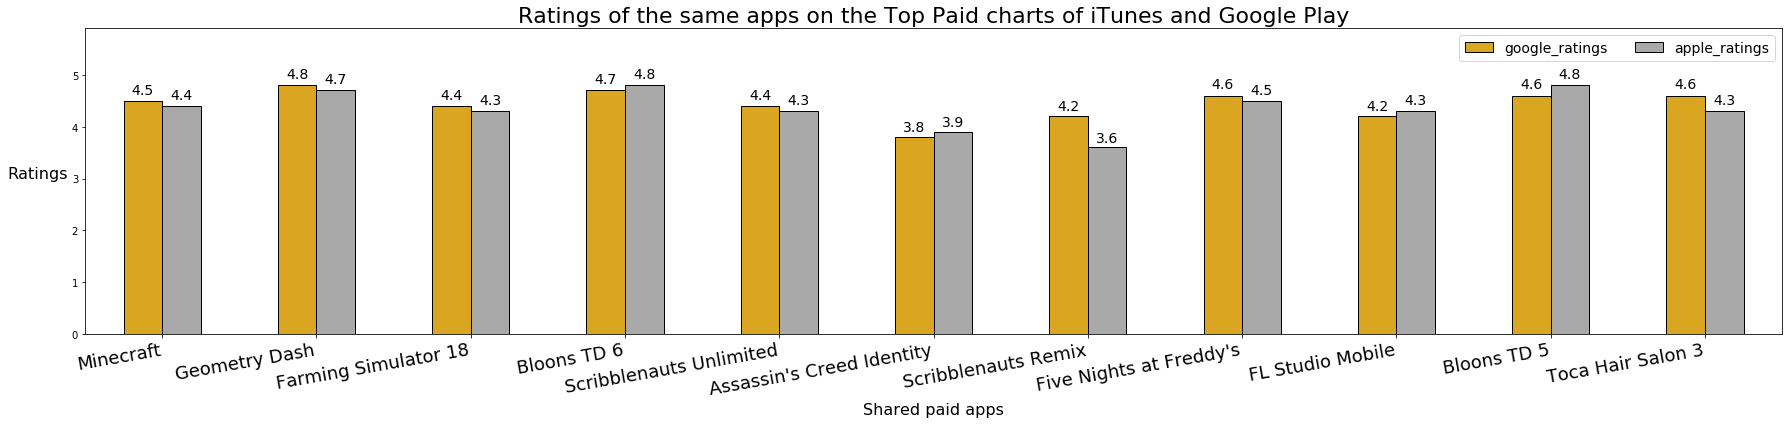

In [18]:
ax = common_paid_apps[['google_ratings', 'apple_ratings', 'title']].plot(figsize=(25, 6), color = ['goldenrod', 'darkgrey'], kind='bar', x='title', edgecolor='k')

ax.set_xlabel('Shared paid apps', fontsize = 16)
ax.set_ylabel('Rating')
ax.set_ylim(0, 5.899)

ax.legend(loc='upper right', ncol=2, fontsize = 14)
ax.set_xticklabels(common_paid_apps['title'], fontsize = 18, rotation = 10, ha = 'right')
ratinglabel = plt.ylabel('Ratings', fontsize = 16, ha = 'right')
ratinglabel.set_rotation(0);

plt.title('Ratings of the same apps on the Top Paid charts of iTunes and Google Play', fontsize = 22)

for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    y = 1.03 * patch.get_height() + bl[1] 
    ax.text(x,y,"%.1f" %(patch.get_height()), ha='center', rotation='horizontal', fontsize = 14)
    
plt.tight_layout()
plt.savefig('Top_paid_sameapp_ratings.png');

In [19]:
apple_paid['index'] = apple_paid.index.values
google_paid['index'] = google_paid.index.values

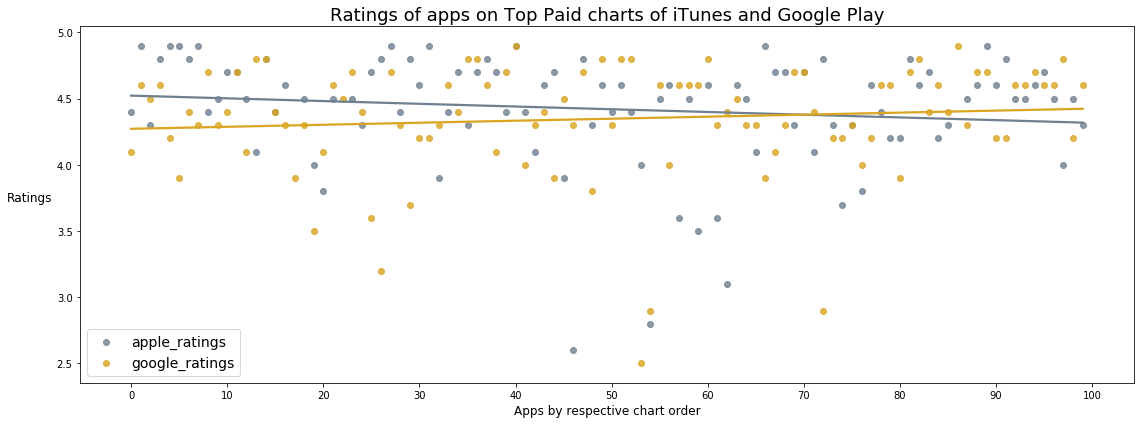

In [20]:
fig, ax = plt.subplots(figsize=(16,6))
sns.regplot('index', 'apple_ratings', truncate = True, color = 'slategrey', label = 'apple_ratings', data=apple_paid, order=1, ci = False, ax=ax)
sns.regplot('index', 'google_ratings', truncate = True, color = 'goldenrod', label = 'google_ratings', data=google_paid, order=1, ci = False, ax=ax)
plt.legend(loc = 'lower left', fontsize = 14)
plt.title('Ratings of apps on Top Paid charts of iTunes and Google Play', fontsize = 18)

plt.xticks(np.arange(0, len(google_paid.google_app) + 10, step=10))
plt.xlabel('Apps by respective chart order', fontsize = 12)
ratinglabel = plt.ylabel('Ratings', fontsize = 12, ha = 'right')
ratinglabel.set_rotation(0);
plt.tight_layout()
plt.savefig('Top_paid_ratings.png');

#### Free Charts

In [21]:
common_free_apps = google_free.merge(apple_free, left_on='google_app', right_on='apple_app')
common_free_apps = common_free_apps.drop(['apple_app'], axis = 1)
common_free_apps.rename(columns={'google_app':'title'}, inplace=True);

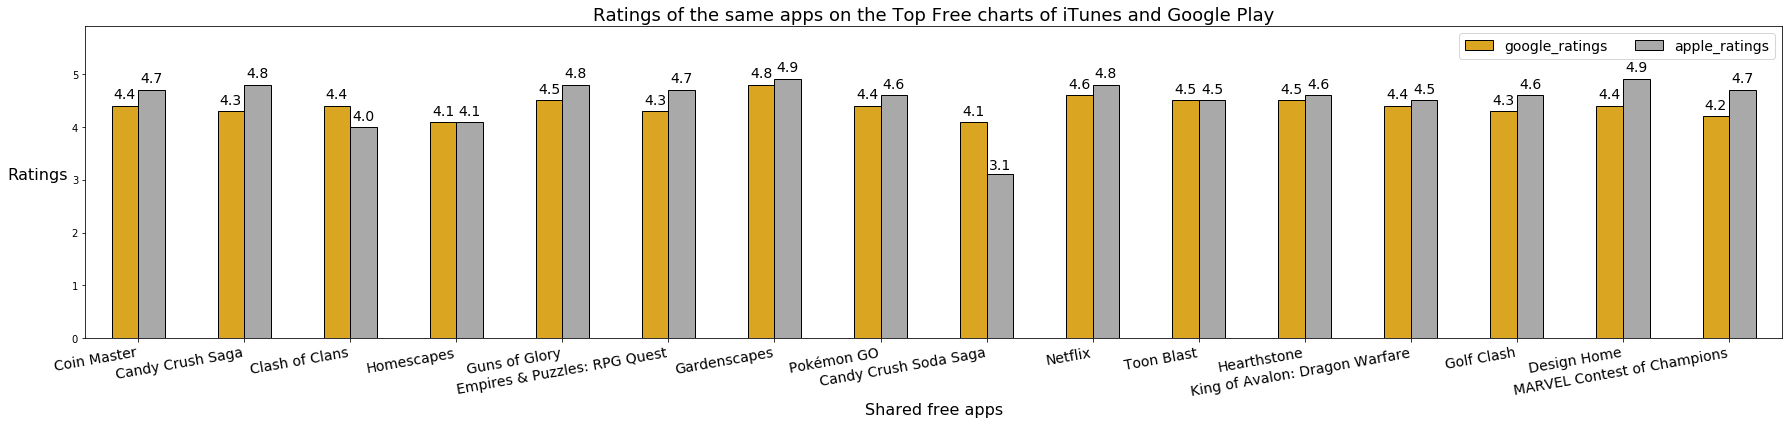

In [22]:
ax = common_free_apps[['google_ratings', 'apple_ratings', 'title']].plot(figsize=(25, 6), color = ['goldenrod', 'darkgrey'], kind='bar', x='title', edgecolor='k')

ax.set_xlabel('Shared free apps', fontsize = 16)
ax.set_ylabel('Rating')
ax.set_ylim(0, 5.899)

ax.legend(loc='upper right', ncol=2, fontsize = 14)
ax.set_xticklabels(common_grossing_apps['title'], fontsize = 14, rotation = 10, ha = 'right')
ratinglabel = plt.ylabel('Ratings', fontsize = 16, ha = 'right')
ratinglabel.set_rotation(0);

plt.title('Ratings of the same apps on the Top Free charts of iTunes and Google Play', fontsize = 18)

for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    y = 1.03 * patch.get_height() + bl[1] 
    ax.text(x,y,"%.1f" %(patch.get_height()), ha='center', rotation='horizontal', fontsize = 14)
    
plt.tight_layout()
plt.savefig('Top_free_sameapp_ratings.png');

In [23]:
apple_free['index'] = apple_free.index.values
google_free['index'] = google_free.index.values

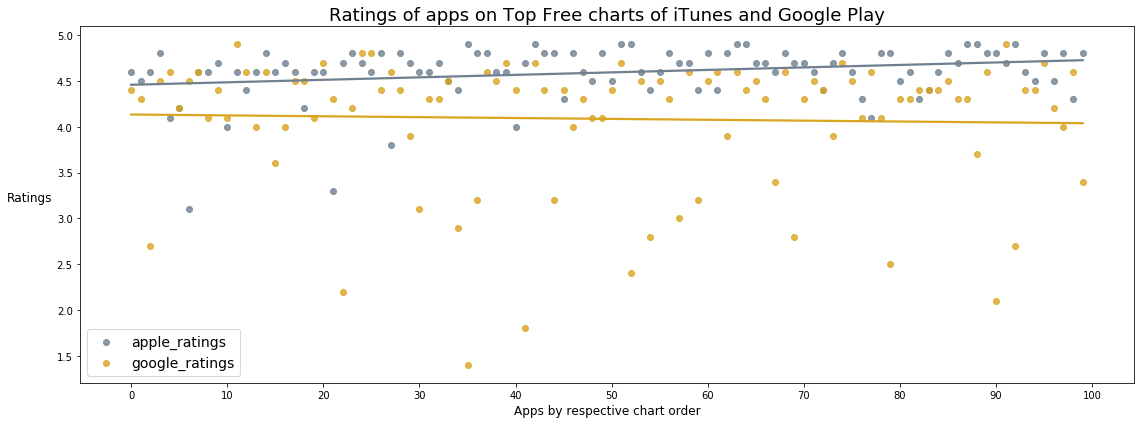

In [24]:
fig, ax = plt.subplots(figsize=(16,6))
sns.regplot('index', 'apple_ratings', truncate = True, color = 'slategrey', label = 'apple_ratings', data=apple_free, order=1, ci = False, ax=ax)
sns.regplot('index', 'google_ratings', truncate = True, color = 'goldenrod', label = 'google_ratings', data=google_free, order=1, ci = False, ax=ax)
plt.legend(loc = 'lower left', fontsize = 14)
plt.title('Ratings of apps on Top Free charts of iTunes and Google Play', fontsize = 18)

plt.xticks(np.arange(0, len(google_free.google_app) + 10, step=10))
plt.xlabel('Apps by respective chart order', fontsize = 12)
ratinglabel = plt.ylabel('Ratings', fontsize = 12, ha = 'right')
ratinglabel.set_rotation(0);
plt.tight_layout()
plt.savefig('Top_free_ratings.png');